In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 8]
matplotlib.rc('font', family='Lato', size=16)

Let $y(x) = \sin x$. Numerically verify the order of finite differences: $\delta_\pm$, $\delta_0$, $\delta_2$ derived on the lecture and 
$$
\delta_3 y(x) = \frac{1}{6h}(2y(x + h) + 3y(x) - 6y(x - h) + y(x -2h)) \text{.}
$$
Draw a plot.

In [3]:
t = np.linspace(0, 2 * np.pi, 1000)
y = lambda t: np.sin(t)

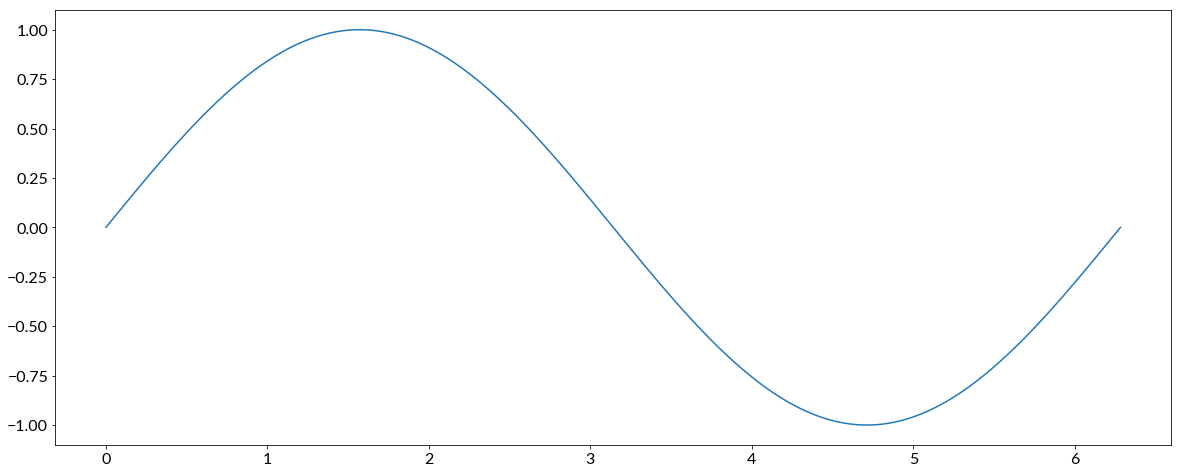

In [4]:
plt.plot(t, y(t))
plt.show()

In [5]:
def delta0(func, h=0.1):
    def derivative(t):
        return (func(t + h) - func(t - h)) / (2 * h)
    return derivative

In [6]:
def delta_plus(func, h=0.1):
    def derivative(t):
        return (func(t + h) - func(t)) / h
    return derivative

In [7]:
def delta_minus(func, h=0.1):
    def derivative(t):
        return (func(t) - func(t - h)) / h
    return derivative

In [8]:
# Add delta_2 (check the equation)

In [9]:
def delta_3(func, h=0.1):
    def derivative(t):
        return (2 * func(t + h) + 3 * func(t) - 6 * func(t - h) + func(t - 2 * h)) / (6 * h)
    return derivative 

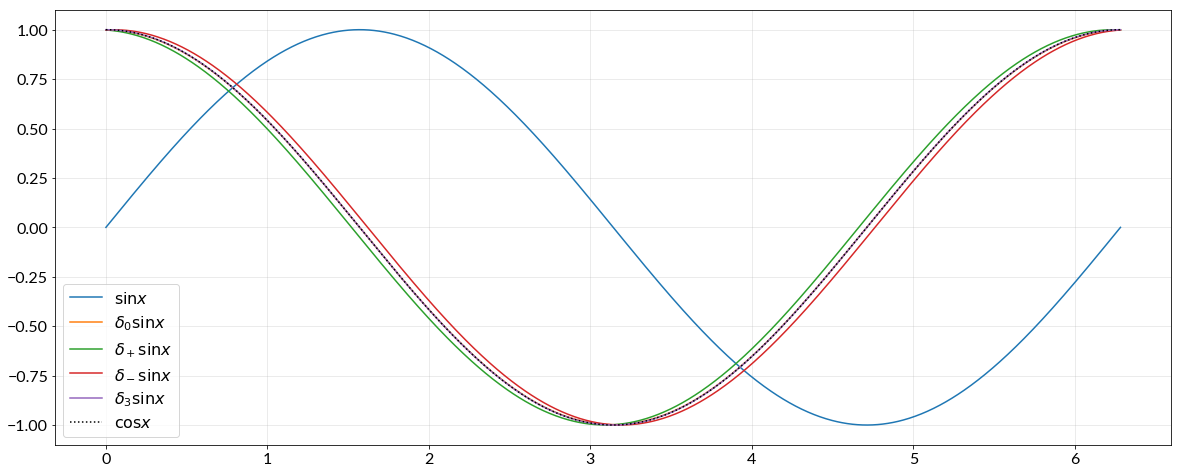

In [10]:
plt.plot(t, y(t), label='$\sin x$')
plt.grid(alpha=0.3)
plt.plot(t, delta0(y)(t), label='$\delta_0 \sin x$')
plt.plot(t, delta_plus(y)(t), label='$\delta_+ \sin x$')
plt.plot(t, delta_minus(y)(t), label='$\delta_- \sin x$')
plt.plot(t, delta_3(y)(t), label='$\delta_3 \sin x$')
plt.plot(t, np.cos(t), 'k:', label='$\cos x$')
plt.legend()
plt.show()

In [11]:
def local_truncation_error(step_sizes, t, operator, base_fun,
                           true_derivative, norm=np.max):
    errors = []
    for step in step_sizes:
        errors.append(norm(np.abs(operator(base_fun, h=step)(t) - true_derivative(t))))
    return np.array(errors)

In [12]:
h = np.logspace(-4, 0)
err = local_truncation_error(h, t, delta0, np.sin, np.cos)
err2 = local_truncation_error(h, t, delta_minus, np.sin, np.cos)

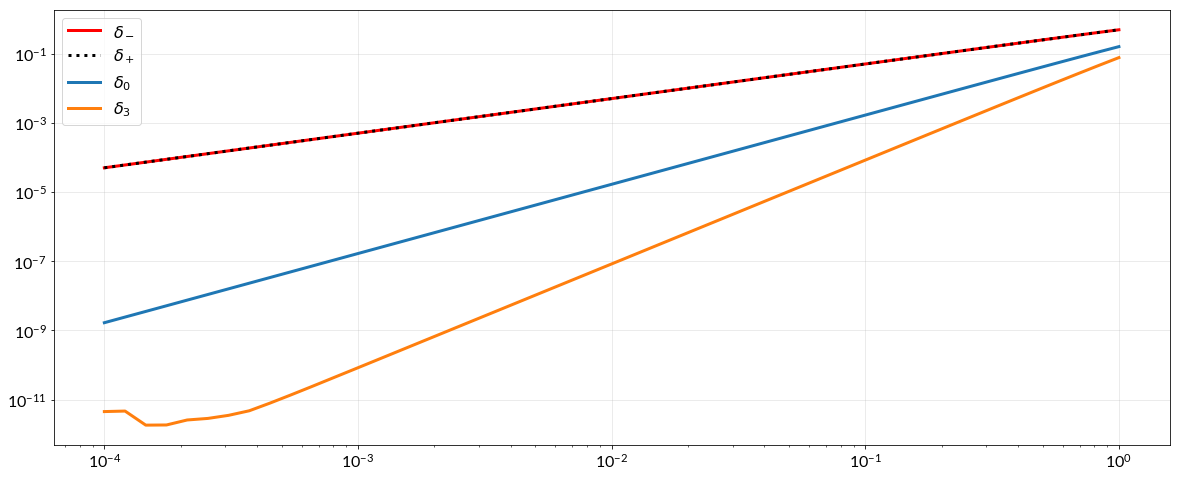

In [18]:
plt.loglog(h, local_truncation_error(h, t, delta_minus, np.sin, np.cos), 
           label='$\delta_-$', color='r', linewidth=3)
plt.loglog(h, local_truncation_error(h, t, delta_plus, np.sin, np.cos), 
           label='$\delta_+$', linestyle=':', color='k', linewidth=3)
plt.loglog(h, local_truncation_error(h, t, delta0, np.sin, np.cos), 
           label='$\delta_0$', linewidth=3)
plt.loglog(h, local_truncation_error(h, t, delta_3, np.sin, np.cos), 
           label='$\delta_3$', linewidth=3)
plt.grid(alpha=0.3)
# plt.axis('equal')
plt.legend()
plt.show()